In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

import networkx as nx

In [ ]:
def plot_graph(G, w):
    
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.tight_layout()

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='C0')

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")


    # edges
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in g_w.edges(data=True)])

    # edge lagel's
    labels = nx.get_edge_attributes(G, 'dist_km')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_South_American_countries_by_area')[0]
df = df[['Country']].loc[0:11, :].sort_values('Country').reset_index(drop=True)

In [4]:
from_   = [0, 0, 0, 0, 0, 10, 10, 3, 3, 3, 7, 7, 7, 1, 1, 1, 1, 1, 
           8, 8, 8, 8, 8, 5, 5, 4, 4, 4, 4, 11, 11, 11, 6, 6, 6, 9, 
           9, 2, 2, 2, 2, 2, 2, 2, 2, 2]
to_     = [1, 2, 3, 7, 10, 0, 2, 0, 1, 8, 0, 1, 2, 0, 2, 3, 7, 8, 1, 
           2, 3, 4, 5, 4, 8, 2, 5, 8, 11, 2, 4, 6, 2, 9, 11, 2, 6, 0,
           1, 4, 6, 7, 8, 9, 10, 11]
dist_km = [2460, 2924, 766, 1735, 966, 966, 1969, 766, 2295, 2965, 1735, 
           959, 1231, 2460, 1271, 2295, 959, 1468, 1468, 2574, 2965, 1532, 
           890, 832, 890, 3234, 832, 1532, 877, 2809, 877, 865, 2259, 338, 
           865, 2068, 338, 2924, 1271, 3234, 2259, 1231, 2574, 2068, 2070, 
           2809]
# http://www.brasildistancia.com/country/AR

df_graph = pd.DataFrame({'from': from_, 'to': to_, 'dist_km': dist_km})

In [5]:
g   = nx.from_pandas_edgelist(df_graph, source='from', target='to')
g_w = nx.from_pandas_edgelist(df_graph, source='from', target='to', 
                              edge_attr='dist_km', create_using=nx.DiGraph())

                 0        1       2      3         4        5       6  \
Country  Argentina  Bolivia  Brazil  Chile  Colombia  Ecuador  Guyana   

                7     8         9       10         11  
Country  Paraguay  Peru  Suriname  Uruguay  Venezuela  


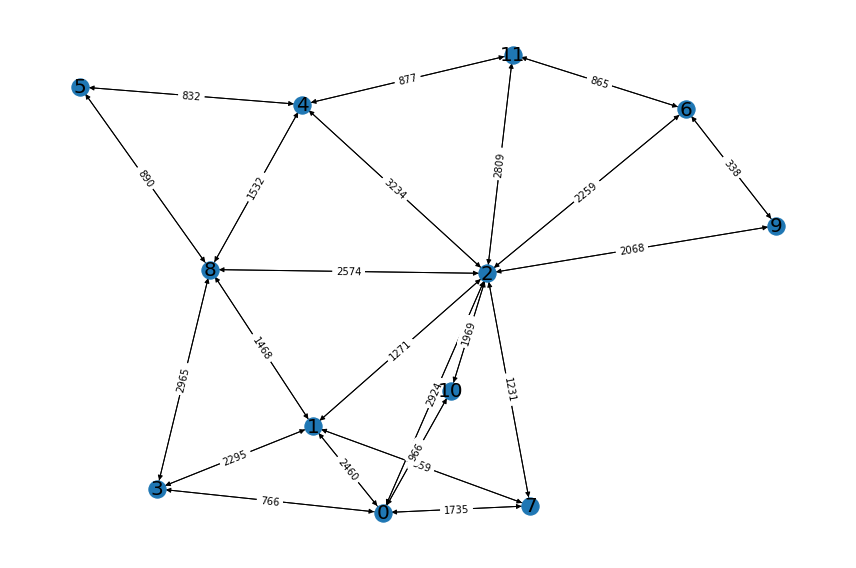

In [6]:
print(df.T)

plt.figure(figsize=(12, 8))
plt.axis("off")
plt.tight_layout()

pos = nx.spring_layout(g_w, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g_w, pos, node_size=300, node_color='C0')

# node labels
nx.draw_networkx_labels(g_w, pos, font_size=20, font_family="sans-serif")


# edges
nx.draw_networkx_edges(g_w, pos, edgelist=[(u, v) for (u, v, d) in g_w.edges(data=True)])

# edge lagel's
labels = nx.get_edge_attributes(g_w, 'dist_km')
nx.draw_networkx_edge_labels(g_w, pos, edge_labels=labels);

### centrality

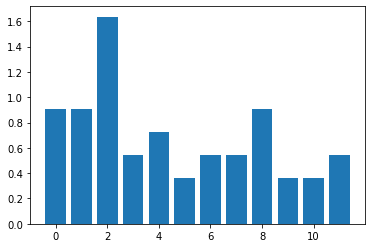

In [7]:
plt.bar(nx.degree_centrality(g_w).keys(),
        nx.degree_centrality(g_w).values());

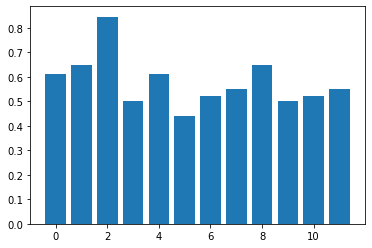

In [8]:
plt.bar(nx.closeness_centrality(g_w).keys(),
        nx.closeness_centrality(g_w).values());

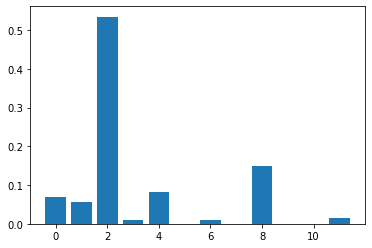

In [9]:
plt.bar(nx.betweenness_centrality(g_w).keys(),
        nx.betweenness_centrality(g_w).values());

### pathfinding

In [10]:
nx.shortest_path(g_w, source=9, target=5, weight='dist_km')

[9, 6, 11, 4, 5]

In [11]:
from itertools import islice 
def k_shortest_paths(g, s, t, w, k):
    return list(islice(nx.shortest_simple_paths(g, source=s, target=t, weight=w), k))

In [12]:
k_shortest_paths(g_w, 9, 5, 'dist_km', 3)

[[9, 6, 11, 4, 5], [9, 6, 11, 4, 8, 5], [9, 2, 8, 5]]

In [13]:
nx.single_source_dijkstra_path(g_w, 9, weight='dist_km')

{9: [9],
 2: [9, 2],
 6: [9, 6],
 11: [9, 6, 11],
 4: [9, 6, 11, 4],
 0: [9, 2, 0],
 1: [9, 2, 1],
 7: [9, 2, 7],
 8: [9, 6, 11, 4, 8],
 10: [9, 2, 10],
 5: [9, 6, 11, 4, 5],
 3: [9, 2, 1, 3]}

In [14]:
# _ = nx.minimum_spanning_tree(g_w, weight='dist_km')

### random walk

In [43]:
n_walks      = 5000
walkLength   = 10

current_node = 0
random_walk = [current_node, ]
for step in range(walkLength):
    
    choice_freq = []
    for n in range(n_walks):
        next_node_ = np.random.choice([n for n in g_w.neighbors(current_node)], 
                                          size=1, 
                                          replace=False).item()

        choice_freq.append(next_node_)
    
    for i in Counter(choice_freq).most_common():
        if i[0] not in random_walk:
            next_node = i[0]
            random_walk.append(next_node)
            break
            
    current_node = next_node

In [44]:
random_walk

[0, 3, 8, 5, 4, 2, 1, 7]

In [17]:
# n_walks      = 30
# walkLength   = 5

# walks = []
# for n in range(n_walks):
    
#     current_node = 10
#     random_walk = []
#     for step in range(walkLength):
                        
#         current_node = np.random.choice([n for n in g_w.neighbors(current_node)], 
#                                         size=1, 
#                                         replace=False).item()
#         random_walk.append(current_node)
        
#     walks.append(random_walk.copy())
    
# walk_prob = np.array(list(zip(*walks)))

In [18]:
# _ = np.array(nx.adj_matrix(g_w, nodelist=range(0, df.shape[0])).todense(), dtype = np.float64)
# D = np.diag(np.sum(_, axis=0))
# T = np.dot(np.linalg.inv(D), _)

# s = 11
# walkLength = 5

# start_node = [0] * df.shape[0]
# start_node[s] = 1

# proba = np.array(start_node)[:, np.newaxis]

# random_walk = []
# for node_ in range(walkLength):    
#     proba = np.dot(T, proba)
#     if node_ == 0:
#         random_walk.append(s)
#         next_node = np.argmax(proba)
#     else:
#         if np.argmax(proba) == random_walk[-2]:
#             next_node = np.argsort(proba, axis=0)[-2].item()
#         else:
#             next_node = np.argmax(proba)
#     random_walk.append(next_node)